In [2]:
!pip install pydot


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import random
from collections import deque

pd.options.display.max_columns = None
pd.options.display.max_rows = None

import warnings
warnings.filterwarnings('ignore')

In [4]:
# 🎯 Reward Logic
# Condition	Base Reward
# 🟢 Converted	+20
# 🟡 Responded only	+2
# 🔴 No response	-1
# ⚪️ No action taken	0

# Then we apply a fatigue penalty:
# final_reward = base_reward - (fatigue_count * fatigue_penalty)

In [5]:
# Action = Marketing Campaign Sent at a Given Time

In [6]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# -------------------------------
# Parameters
# -------------------------------
num_customers = 100
max_events_per_customer = 10

# Define campaigns and their base conversion rates
campaigns = {
    "Email Promo": 0.15,
    "SMS Offer": 0.20,
    "Call": 0.25,
    "No Action": 0.0
}

# Action to channel mapping
action_to_channel = {
    "Email Promo": "Email",
    "SMS Offer": "SMS",
    "Call": "Call",
    "No Action": "None"
}

# Fatigue and reward penalty
fatigue_penalty_per_repeat = 0.03
reward_penalty_per_fatigue = 0.5

# -------------------------------
# Step 1: Generate Customer Profiles
# -------------------------------
locations = ['Mumbai', 'Delhi', 'Bangalore', 'Chennai']
products = ['Credit Card', 'Loan', 'Savings Account', 'Insurance']

profile_data = []
for i in range(num_customers):
    profile_data.append({
        "customer_id": f"C{i:03d}",
        "age": random.randint(22, 60),
        "gender": random.choice(['M', 'F']),
        "location": random.choice(locations),
        "salary": random.randint(30000, 150000),
        "product_owned": random.choice(products)
    })

df_profiles = pd.DataFrame(profile_data)
df_profiles.to_csv("customer_profiles.csv", index=False)

# -------------------------------
# Step 2: Create Campaign Metadata
# -------------------------------
df_campaigns = pd.DataFrame([
    {"action_name": k, "base_conversion_rate": v} for k, v in campaigns.items()
])
df_campaigns.to_csv("campaign_metadata.csv", index=False)

# -------------------------------
# Step 3: Define Reward Function
# -------------------------------
def compute_reward(responded, converted, fatigue_count, action_taken):
    if action_taken == "No Action":
        return 0.0
    if converted:
        base = 20.0  # High reward for conversion
    elif responded:
        base = 2.0
    else:
        base = -1.0
    penalty = fatigue_count * reward_penalty_per_fatigue
    return max(base - penalty, -5.0)

# -------------------------------
# Step 4: Generate Customer Events
# -------------------------------
event_types = ['click', 'visit', 'purchase', 'login']
all_events = []

for customer in df_profiles['customer_id']:
    fatigue_counter = {action: 0 for action in campaigns}
    channel_fatigue = {"Email": 0, "SMS": 0, "Call": 0, "None": 0}
    
    start_time = datetime(2023, 6, 1)
    last_time = start_time

    for step in range(max_events_per_customer):
        action = random.choices(list(campaigns.keys()), weights=[0.4, 0.3, 0.2, 0.1])[0]
        base_rate = campaigns[action]
        fatigue = fatigue_counter[action]
        adjusted_rate = max(base_rate - fatigue_penalty_per_repeat * fatigue, 0.01)

        responded = 1 if random.random() < adjusted_rate + 0.1 else 0
        converted = 1 if random.random() < adjusted_rate else 0

        # Time handling
        if step == 0:
            gap_days = 0
            event_time = start_time
        else:
            gap_days = random.randint(1, 5)
            event_time = last_time + timedelta(days=gap_days)
        last_time = event_time

        # Other event data
        event_type = random.choice(event_types)
        amount = random.randint(100, 2000) if event_type == 'purchase' else 0

        reward = compute_reward(responded, converted, fatigue, action)
        channel = action_to_channel[action]

        all_events.append({
            "customer_id": customer,
            "timestamp": event_time.strftime('%Y-%m-%d %H:%M:%S'),
            "event_type": event_type,
            "amount": amount,
            "action_taken": action,
            "channel": channel,
            "responded": responded,
            "converted": converted,
            "fatigue_count": fatigue,
            "gap_days": gap_days,
            "reward": round(reward, 2)
        })

        # Update fatigue trackers
        fatigue_counter[action] += 1
        channel_fatigue[channel] += 1

        if converted == 1:
            break  # Stop on conversion

# Save all events
df_events = pd.DataFrame(all_events)
df_events.to_csv("customer_events.csv", index=False)

print("✅ Synthetic data generated with channel info and reward logic.")

✅ Synthetic data generated with channel info and reward logic.


In [7]:
print (df_events.shape)
df_events.head(100)

(552, 11)


,customer_id,timestamp,event_type,amount,action_taken,channel,responded,converted,fatigue_count,gap_days,reward
0,C000,2023-06-01 00:00:00,login,0,Email Promo,Email,0,0,0,0,-1.0
1,C000,2023-06-04 00:00:00,login,0,No Action,None,0,0,0,3,0.0
2,C000,2023-06-09 00:00:00,purchase,1593,Email Promo,Email,0,0,1,5,-1.5
3,C000,2023-06-10 00:00:00,click,0,Call,Call,0,1,0,1,20.0
4,C001,2023-06-01 00:00:00,purchase,1731,Email Promo,Email,0,0,0,0,-1.0
5,C001,2023-06-06 00:00:00,login,0,SMS Offer,SMS,0,1,0,5,20.0
6,C002,2023-06-01 00:00:00,visit,0,No Action,None,0,0,0,0,0.0
7,C002,2023-06-04 00:00:00,login,0,Email Promo,Email,0,0,0,3,-1.0
8,C002,2023-06-09 00:00:00,visit,0,No Action,None,0,0,1,5,0.0
9,C002,2023-06-13 00:00:00,login,0,SMS Offer,SMS,1,0,0,4,2.0


In [8]:
df_events["customer_id"].nunique()

100

In [9]:
print (df_profiles.shape)
df_profiles.head()

(100, 6)


,customer_id,age,gender,location,salary,product_owned
0,C000,32,F,Mumbai,139034,Savings Account
1,C001,52,F,Bangalore,125183,Insurance
2,C002,35,M,Mumbai,67332,Savings Account
3,C003,37,F,Bangalore,52202,Insurance
4,C004,37,F,Chennai,144474,Loan


## ✅ Step 3 Code — Preprocessing and Encoding

In [10]:
# 📊 Output Shapes
# Variable	Shape	Description
# state_seq	(num_customers, max_seq_len, 7)	Sequential input to Transformer
# state_profile	(num_customers, 5)	Customer static data
# target_rewards	(num_customers,)	Final reward (for now)



In [11]:
# 🧠 Input Format for Transformer
# 🔹 state_seq: Sequence per customer
# A padded list of timesteps (length T, padded to max):
# [t0, t1, t2, ..., tT]

# Each timestep vector:
# [event_type_id, action_id, amount, gap_days, fatigue, responded, converted]

# 🔹 state_profile: Static features
# [age, gender_id, salary, location_id, product_id]

# 🔹 target: Reward/Q-value for each timestep
# Used for computing loss during training.



In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load data
events = pd.read_csv("customer_events.csv")
profiles = pd.read_csv("customer_profiles.csv")

# Merge profiles with events
data = events.merge(profiles, on="customer_id", how="left")

# Encode categorical fields
encoders = {}
for col in ['event_type', 'action_taken', 'channel', 'gender', 'location', 'product_owned']:
    le = LabelEncoder()
    data[col + '_id'] = le.fit_transform(data[col])
    encoders[col] = le

# Group by customer
grouped = data.groupby("customer_id")

sequences = []
static_profiles = []
rewards = []

max_seq_len = 10

for cid, group in grouped:
    group = group.sort_values("timestamp")

    seq = []
    for step, row in enumerate(group.itertuples()):
        seq.append([
            step,                         # 🆕 step index
            row.event_type_id,
            row.action_taken_id,
            row.amount,
            row.gap_days,
            row.fatigue_count,
            row.responded,
            row.converted
        ])
        rewards.append(row.reward)

    # Pad sequence
    seq_padded = pad_sequences([seq], maxlen=max_seq_len, padding='post', dtype='float32')[0]
    sequences.append(seq_padded)

    # Static profile
    static = [
        row.age,
        row.gender_id,
        row.salary,
        row.location_id,
        row.product_owned_id
    ]
    static_profiles.append(static)

# Final arrays
state_seq = np.array(sequences)
state_profile = np.array(static_profiles)
target_rewards = np.array(rewards)

print("✅ state_seq shape:", state_seq.shape)         # (N, T, 8)
print("✅ state_profile shape:", state_profile.shape) # (N, 5)
print("✅ target_rewards shape:", target_rewards.shape)

✅ state_seq shape: (100, 10, 8)
✅ state_profile shape: (100, 5)
✅ target_rewards shape: (552,)


In [13]:
# 📊 Output Shapes
# Variable	Shape	Description
# state_seq	(num_customers, max_seq_len, 7)	Sequential input to Transformer
# state_profile	(num_customers, 5)	Customer static data
# target_rewards	(num_customers,)	Final reward (for now)

In [14]:
# 🧠 Each Timestep Vector (7 Features)
# Feature	Description	Example Value
# event_type_id	Encoded ID for event (e.g. click, visit, login)	2
# action_taken_id	Encoded ID for campaign action (e.g. Email Promo)	1
# amount	Purchase amount (0 if not a purchase)	500
# gap_days	Days since previous action	3
# fatigue_count	Times this campaign has already been shown	2
# responded	1 if customer showed interest (click/visit), else 0	1
# converted	1 if customer converted (terminal state), else 0	0


# [step,event_type, action, amount, gap, fatigue, responded, converted]
state_seq[1]

array([[0.000e+00, 2.000e+00, 1.000e+00, 1.731e+03, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00],
       [1.000e+00, 1.000e+00, 3.000e+00, 0.000e+00, 5.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.0

In [15]:
# df_events.head(20)

## Step 4: Building the Transformer + Q-Learning Model 

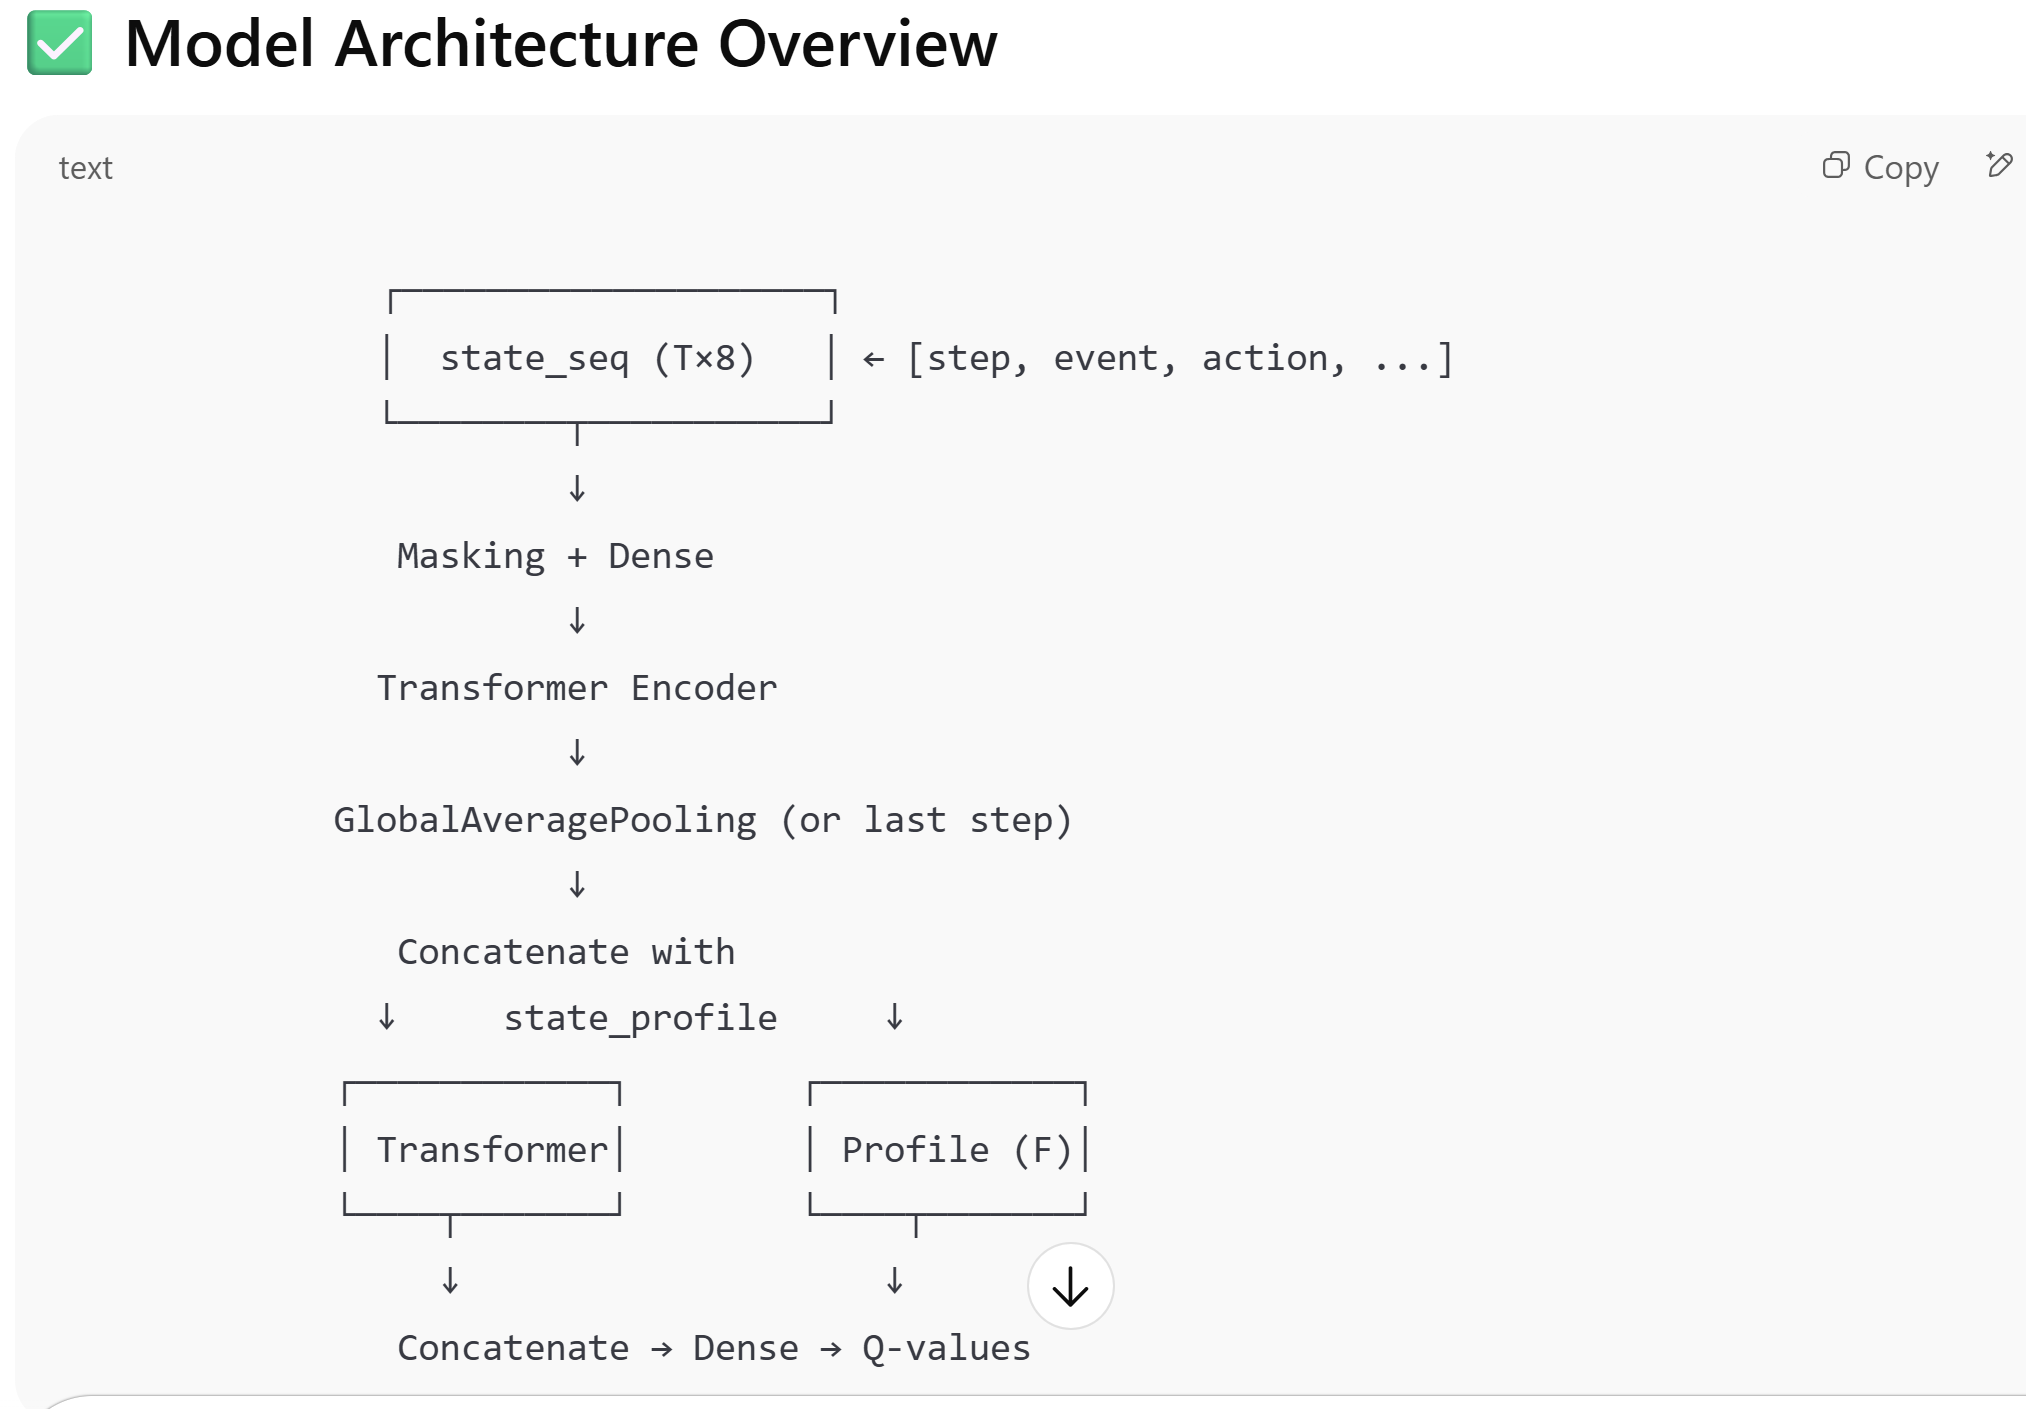


In [16]:
# 🧠 Input Shape Recap
# Input	Shape
# state_seq	(batch, T, 8)
# state_profile	(batch, 5)
# Output	(batch, num_actions)

In [17]:
# 🧠 Notes
# Masking(mask_value=0.0) ensures padded timesteps are ignored in attention.

# GlobalAveragePooling1D() summarizes the sequence — you can also use the last timestep or attention-weighted output.

# loss='mse' is used for Q-learning:

# target = reward + gamma * max(Q(next_state))

In [18]:
import tensorflow as tf
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import (
    Dense, Dropout, LayerNormalization, MultiHeadAttention, Masking,
    Lambda, Concatenate, GlobalAveragePooling1D
)

# --- Parameters ---
max_seq_len = 10
seq_feature_dim = 8        # Includes: step, event, action, amount, gap_days, fatigue, responded, converted
profile_dim = 5            # Static features
num_actions = 4
embed_dim = 64
ff_dim = 128
num_heads = 2
gap_embed_dim = 4
fatigue_embed_dim = 4

# --- Input Layers ---
state_seq_input = Input(shape=(max_seq_len, seq_feature_dim), name="state_seq")    # (B, T, 8)
profile_input = Input(shape=(profile_dim,), name="profile_input")                  # (B, 5)

# --- Lambda Slice Functions (SAFE) ---
def slice_gap_days(x): return x[:, :, 4:5]
def slice_fatigue(x): return x[:, :, 5:6]
def remove_gap_and_fatigue(x): return tf.concat([x[:, :, :4], x[:, :, 6:]], axis=-1)

# --- Slice time & fatigue features ---
gap_days_input = Lambda(slice_gap_days, name='slice_gap_days')(state_seq_input)     # (B, T, 1)
fatigue_input = Lambda(slice_fatigue, name='slice_fatigue')(state_seq_input)        # (B, T, 1)

# --- Embedding layers ---
gap_embed = Dense(gap_embed_dim, activation='relu', name='gap_embed')(gap_days_input)
fatigue_embed = Dense(fatigue_embed_dim, activation='relu', name='fatigue_embed')(fatigue_input)

# --- Remove gap/fatigue from sequence and concat back embeddings ---
non_time_input = Lambda(remove_gap_and_fatigue, name="remove_gap_fatigue")(state_seq_input)
x = Concatenate(axis=-1)([non_time_input, gap_embed, fatigue_embed])  # (B, T, 6+4+4 = 14)

attn_out = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)(x, x)
attn_out = Dropout(0.1)(attn_out)
x = LayerNormalization()(x + attn_out)

x_proj = Dense(ff_dim)(x)
ff = Dense(ff_dim, activation='relu')(x)
ff = Dropout(0.1)(ff)
x = LayerNormalization()(x_proj + ff)

x = GlobalAveragePooling1D()(x)

# --- Combine with static profile ---
x = Concatenate()([x, profile_input])
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)

# --- Q-value output ---
q_values = Dense(num_actions, activation='linear', name="q_values")(x)

# --- Compile Model ---
model = Model(inputs=[state_seq_input, profile_input], outputs=q_values)
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ state_seq (InputLayer)        │ (None, 10, 8)             │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ slice_gap_days (Lambda)       │ (None, 10, 1)             │               0 │ state_seq[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ slice_fatigue (Lambda)        │ (None, 10, 1)             │               0 │ state_seq[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ remove_gap_fatigue (Lambda)   │ (None, 10, 6)             │               0 │ state_seq[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ gap_embed (Dense)             │ (None, 10, 4)             │               8 │ slice_gap_days[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ fatigue_embed (Dense)         │ (None, 10, 4)             │               8 │ slice_fatigue[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate (Concatenate)     │ (None, 10, 14)            │               0 │ remove_gap_fatigue[0][0],  │
│                               │                           │                 │ gap_embed[0][0],           │
│                               │                           │                 │ fatigue_embed[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ masking (Masking)             │ (None, 10, 14)            │               0 │ concatenate[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense (Dense)                 │ (None, 10, 64)            │             960 │ masking[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ multi_head_attention          │ (None, 10, 64)            │          33,216 │ dense[0][0], dense[0][0]   │
│ (MultiHeadAttention)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_1 (Dropout)           │ (None, 10, 64)            │               0 │ multi_head_attention[0][0] │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ add (Add)                     │ (None, 10, 64)            │               0 │ dense[0][0],               │
│                               │                           │                 │ dropout_1[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ layer_normalization           │ (None, 10, 64)            │             128 │ add[0][0]                  │
│ (LayerNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_2 (Dense)               │ (None, 10, 128)           │           8,320 │ layer_normalization[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_1 (Dense)               │ (None, 10, 128)           │           8,32

 Total params: 60,052 (234.58 KB)

 Trainable params: 60,052 (234.58 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Reminder
# Your state_seq must include:

# [step_index, event_type_id, action_id, amount, gap_days, fatigue, responded, converted]

In [20]:
# from keras_visualizer import visualizer
# visualizer(model, 'model_flow_keras_visualizer.png', view=True)

In [21]:
# !pip install keras-visualizer==0.2.9


## ✅ Step 5: Full Training Loop Code

In [22]:
# Component	Role
# ReplayBuffer	Stores past (state, action, reward, next_state)
# epsilon	Balances exploration vs. exploitation
# target_model	Stable Q-learning updates
# gamma	Discount factor

In [23]:
# 🎯 Goal
# Implement a Q-learning training loop with:
# 🎲 Epsilon-greedy exploration
# 🔁 Experience Replay Buffer
# 🎯 Q-value updates using target network
# 📈 Reward tracking and visualization

In [24]:
import numpy as np
import random
from collections import deque
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.utils import get_custom_objects

# --- Lambda registration for safe deserialization ---
get_custom_objects().update({
    'slice_gap_days': Lambda(slice_gap_days),
    'slice_fatigue': Lambda(slice_fatigue),
    'remove_gap_and_fatigue': Lambda(remove_gap_and_fatigue)
})

# --- Clone model safely ---
model_config = model.get_config()
target_model = Model.from_config(model_config, custom_objects=get_custom_objects())
target_model.set_weights(model.get_weights())

# --- Hyperparameters ---
gamma = 0.99
epsilon = 1.0
epsilon_min = 0.1
epsilon_decay = 0.995
batch_size = 32
train_epochs = 10
update_target_every = 5

# --- Replay Buffer ---
replay_buffer = deque(maxlen=10000)

# --- Logs ---
reward_log = []
batch_losses = []
epsilon_log = []

# --- Helper: get max Q-value from target model ---
def get_max_q(model, state_seq, state_profile):
    q_values = model.predict([state_seq, state_profile], verbose=0)
    return np.max(q_values, axis=1)

# --- Q-learning Loop ---
for epoch in range(train_epochs):
    total_reward = 0

    for idx in range(len(state_seq)):
        state = state_seq[idx:idx+1]
        profile = state_profile[idx:idx+1]
        reward = target_rewards[idx]

        # --- Epsilon-greedy action selection ---
        if np.random.rand() < epsilon:
            action = np.random.randint(num_actions)
        else:
            q_vals = model.predict([state, profile], verbose=0)
            action = np.argmax(q_vals[0])

        # --- Simulate next state ---
        if idx < len(state_seq) - 1:
            next_state = state_seq[idx+1:idx+2]
            next_profile = state_profile[idx+1:idx+2]
        else:
            next_state = np.zeros_like(state)
            next_profile = np.zeros_like(profile)

        # --- Q target value ---
        next_q = get_max_q(target_model, next_state, next_profile)
        target_q = reward + gamma * next_q

        # --- Add to replay buffer ---
        replay_buffer.append((state, profile, action, reward, next_state, next_profile, target_q))
        total_reward += reward

        # --- Sample minibatch and train ---
        if len(replay_buffer) >= batch_size:
            minibatch = random.sample(replay_buffer, batch_size)
            states_mb, profiles_mb, targets_mb = [], [], []

            for s, p, a, r, s_next, p_next, t_q in minibatch:
                q_vals = model.predict([s, p], verbose=0)[0]
                q_vals[a] = t_q
                states_mb.append(s[0])
                profiles_mb.append(p[0])
                targets_mb.append(q_vals)

            loss = model.train_on_batch(
                [np.array(states_mb), np.array(profiles_mb)],
                np.array(targets_mb)
            )
            batch_losses.append(loss)

    # --- Epsilon Decay ---
    epsilon = max(epsilon_min, epsilon * epsilon_decay)
    epsilon_log.append(epsilon)

    # --- Update Target Model ---
    if epoch % update_target_every == 0:
        target_model.set_weights(model.get_weights())

    reward_log.append(total_reward)
    print(f"Epoch {epoch+1}/{train_epochs} | Total Reward: {total_reward:.2f} | Epsilon: {epsilon:.3f}")


Epoch 1/10 | Total Reward: 295.50 | Epsilon: 0.995
Epoch 2/10 | Total Reward: 295.50 | Epsilon: 0.990
Epoch 3/10 | Total Reward: 295.50 | Epsilon: 0.985
Epoch 4/10 | Total Reward: 295.50 | Epsilon: 0.980
Epoch 5/10 | Total Reward: 295.50 | Epsilon: 0.975
Epoch 6/10 | Total Reward: 295.50 | Epsilon: 0.970
Epoch 7/10 | Total Reward: 295.50 | Epsilon: 0.966
Epoch 8/10 | Total Reward: 295.50 | Epsilon: 0.961
Epoch 9/10 | Total Reward: 295.50 | Epsilon: 0.956
Epoch 10/10 | Total Reward: 295.50 | Epsilon: 0.951


## ✅ After Training — Plot All Visualizations


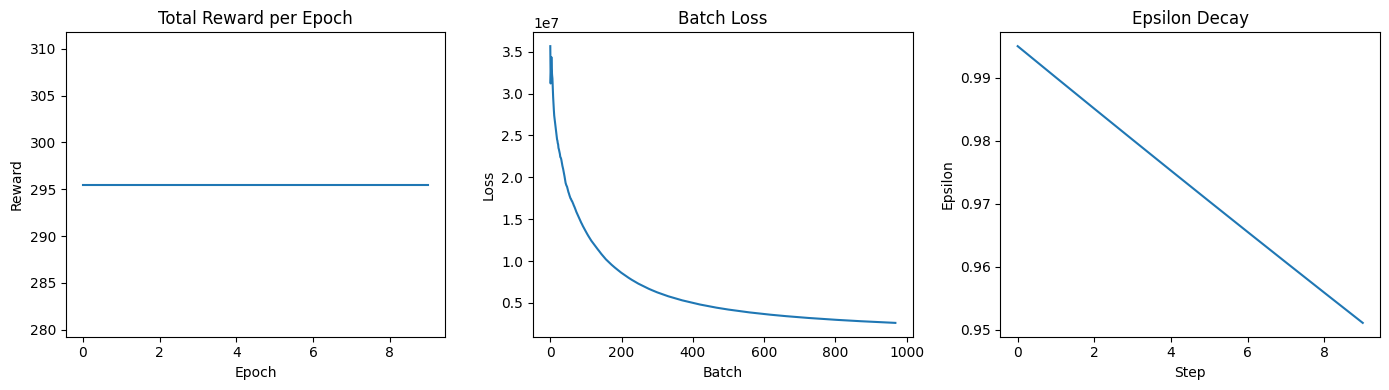

In [25]:
import matplotlib.pyplot as plt

# Visualize training progress
plt.figure(figsize=(14, 4))

plt.subplot(1, 3, 1)
plt.plot(reward_log)
plt.title("Total Reward per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Reward")

plt.subplot(1, 3, 2)
plt.plot(batch_losses)
plt.title("Batch Loss")
plt.xlabel("Batch")
plt.ylabel("Loss")

plt.subplot(1, 3, 3)
plt.plot(epsilon_log)
plt.title("Epsilon Decay")
plt.xlabel("Step")
plt.ylabel("Epsilon")

plt.tight_layout()
plt.show()


## 👤 New customer static profile

In [26]:
# 👤 New customer static profile
# Format: [age, gender_id, salary, location_id, product_owned_id]
new_profile = np.array([[35, 1, 60000, 2, 0]])

# 🧾 New customer event history (variable length)
# Format per event: [step, event_type_id, action_id, amount, gap_days, fatigue, responded, converted]
new_history = [
    [0, 0, 0, 0.0, 0, 0, 0, 0],  # First touch
    [1, 1, 1, 0.0, 3, 1, 1, 0],  # Responded to SMS
    [2, 2, 1, 200.0, 2, 2, 1, 1], # Converted via SMS
]

# Pad to match model input size
new_seq = tf.keras.preprocessing.sequence.pad_sequences(
    [new_history], maxlen=max_seq_len, padding='post', dtype='float32'
)

# 🔮 Predict Q-values
pred_q = model.predict([new_seq, new_profile], verbose=0)
best_action = np.argmax(pred_q[0])
all_q = pred_q[0]

# Action labels if needed (e.g. for inverse transform)
action_labels = ['Email Promo', 'SMS Offer', 'Call', 'No Action']

print("🧠 Q-values for actions:", all_q)
print("✅ Recommended next action:", action_labels[best_action])

🧠 Q-values for actions: [1331.8142 1433.6809 1454.4335 1558.3904]
✅ Recommended next action: No Action


In [27]:
# Add intent prediction (multi-task head)

In [28]:
import numpy as np

# Example: 3 new customers
# 10 time steps, 8 features (step, event, action, amount, gap_days, fatigue, responded, converted)
new_state_seq = np.random.rand(3, 10, 8).astype(np.float32)

# Profile features: (e.g., age, gender, salary, location, previous products)
new_state_profile = np.random.rand(3, 5).astype(np.float32)

In [29]:
#🔹 Step 2: Predict Q-values & Best Action

In [30]:
# Predict Q-values for each customer
q_values = model.predict([new_state_seq, new_state_profile], verbose=0)  # (3, 4) if num_actions=4

# Choose best action (argmax)
best_actions = np.argmax(q_values, axis=1)

# Print results
for i in range(len(q_values)):
    print(f"Customer {i+1}: Best Action = {best_actions[i]}, Q-values = {q_values[i]}")

Customer 1: Best Action = 3, Q-values = [147.03473 151.25847 156.18362 161.71144]
Customer 2: Best Action = 3, Q-values = [147.51706 151.87685 156.723   162.25906]
Customer 3: Best Action = 3, Q-values = [147.25032 151.42166 156.37349 161.88904]


In [31]:
#🔹 Optional: Decode Action Index to Labels

In [32]:
action_labels = {
    0: "Email",
    1: "SMS",
    2: "Push Notification",
    3: "Call Center"
}

decoded_actions = [action_labels[a] for a in best_actions]
print(decoded_actions)

['Call Center', 'Call Center', 'Call Center']
